In [20]:
!pip install yfinance

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, SimpleExpSmoothing,Holt)

In [22]:
plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')
COLORS=[plt.cm.cubehelix(x) for x in [0.1,0.3,0.5,0.7]]

<Figure size 432x288 with 0 Axes>

In [23]:
df=yf.download('TSLA',start='2010-01-1',end='2018-12-31',adjusted=True,progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [24]:
tesla=df.resample('M').last()\
                      .rename(columns={'Adj Close':'adj_close'})\
                      .adj_close

tesla.head()

Date
2010-06-30    4.766
2010-07-31    3.988
2010-08-31    3.896
2010-09-30    4.082
2010-10-31    4.368
Freq: M, Name: adj_close, dtype: float64

In [25]:
indicator=tesla.index.year<2018
tesla_train=tesla[indicator]
tesla_train=tesla[~indicator]
tesla_length=len(tesla)

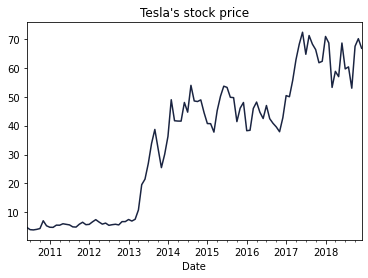

In [26]:
tesla.plot(title="Tesla's stock price")

In [27]:
ses_1=SimpleExpSmoothing(tesla_train).fit(smoothing_level=0.2)
ses_forcasting_1=ses_1.forecast(test_length)
ses_2=SimpleExpSmoothing(tesla_train).fit(smoothing_level=0.5)
ses_forcasting_2=ses_2.forecast(test_length)

ses_3=SimpleExpSmoothing(tesla_train).fit()
alpha=ses_3.model.params['smoothing_level']
ses_forcasting_3=ses_3.forecast(test_length)

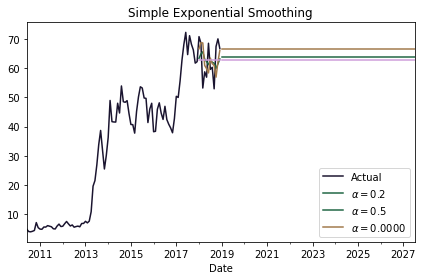

In [28]:
tesla.plot(color=COLORS[0], 
          title='Simple Exponential Smoothing',
          label='Actual',
          legend=True)

ses_forcasting_1.plot(color=COLORS[1], legend=True, 
                    label=r'$\alpha=0.2$')
ses_1.fittedvalues.plot(color=COLORS[1])

ses_forcasting_2.plot(color=COLORS[2], legend=True, 
                    label=r'$\alpha=0.5$')
ses_2.fittedvalues.plot(color=COLORS[2])

ses_forcasting_3.plot(color=COLORS[3], legend=True, 
                    label=r'$\alpha={0:.4f}$'.format(alpha))
ses_3.fittedvalues.plot(color=COLORS[3])

plt.tight_layout()
#plt.savefig('images/ch3_im15.png')
plt.show()

In [29]:
#linear holt model
hs_1=Holt(tesla_train).fit()
hs_forecast_1=hs_1.forecast(tesla_length)

#exponentional holt model
hs_2=Holt(tesla_train,exponential=True).fit()
hs_forecast_2=hs_2.forecast(tesla_length)

#Holt's model with exponential trend and damping
hs_3=Holt(tesla_train,exponential=False,damped=True).fit(damping_slope=0.99)
hs_forecast_3=hs_3.forecast(tesla_length)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


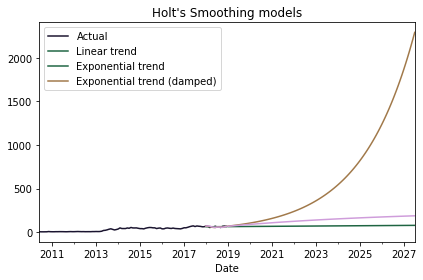

In [30]:
tesla.plot(color=COLORS[0],
          title="Holt's Smoothing models",
          label='Actual',
          legend=True)

hs_1.fittedvalues.plot(color=COLORS[1])
hs_forecast_1.plot(color=COLORS[1], legend=True, 
                   label='Linear trend')

hs_2.fittedvalues.plot(color=COLORS[2])
hs_forecast_2.plot(color=COLORS[2], legend=True, 
                   label='Exponential trend')

hs_3.fittedvalues.plot(color=COLORS[3])
hs_forecast_3.plot(color=COLORS[3], legend=True, 
                   label='Exponential trend (damped)')

plt.tight_layout()
#plt.savefig('images/ch3_im16.png')
plt.show()

In [37]:

SEASONAL_PERIODS=12
#holt-winter's model, exponential trend
hw_1=ExponentialSmoothing(tesla_train,trend='mul',seasonal='add',seasonal_periods=SEASONAL_PERIODS).fit()
hw_forecast_1=hw_1.forecast(tesla_length)

#holt-winter's model, exponential trend + damped

hw_2=ExponentialSmoothing(tesla_train,trend='mul',seasonal='add',seasonal_periods=SEASONAL_PERIODS,damped=True).fit()
hw_forecast_2=hw_2.forecast(tesla_length)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:772: RuntimeWarning: Mean of empty slice.
  b0 = np.exp((np.log(lead.mean()) - np.log(lag.mean())) / m)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:772: RuntimeWarning: Mean of empty slice.
  b0 = np.exp((np.log(lead.mean()) - np.log(lag.mean())) / m)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  Conver

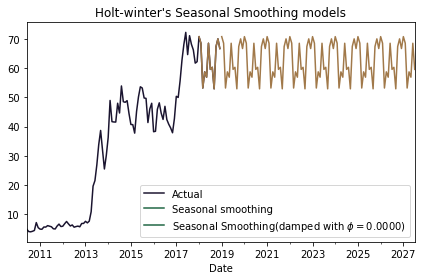

In [38]:
tesla.plot(color=COLORS[0],
          title="Holt-winter's Seasonal Smoothing models",
          label='Actual',
          legend=True)

hw_1.fittedvalues.plot(color=COLORS[1])
hw_forecast_1.plot(color=COLORS[1], legend=True, 
                   label='Seasonal smoothing')


phi= hw_2.model.params['damping_slope']
plot_label=f'Seasonal Smoothing(damped with $\phi={phi:.4f}$)'

hw_2.fittedvalues.plot(color=COLORS[2])
hw_forecast_2.plot(color=COLORS[2], legend=True, 
                   label=plot_label)


plt.tight_layout()
#plt.savefig('images/ch3_im16.png')
plt.show()